#### Customers Segmentation

#### Load libraries

In [ ]:
import pandas as pd
import numpy as np
import duckdb
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE
import seaborn as sns
import umap
import joblib
import sys

### Load the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\USER\Documents\Customer Intention\df_post_camp_shap2.csv")
print(df.shape)
df.head()

(40000, 56)


,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,age_group_Young,balance_group_High,balance_group_Low,day_group_Early,day_group_Late,day_group_Mid,campaign_group_High,campaign_group_Low,campaign_group_Moderate,y
0,1.821705,1.173558,-1.3309,0.429153,-1.140505,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,0.361477,-0.850451,-1.3309,-0.195075,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,-0.785845,-0.899427,-1.3309,-0.921066,-1.140505,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,0.674383,0.639102,-1.3309,-0.725270,-1.140505,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.785845,-0.901809,-1.3309,0.108862,-1.140505,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0


### Select all rows where y = 1 from the dataset using duchdb.

In [5]:
# Run a DuckDB SQL query

result = duckdb.query("""
    SELECT *
    FROM df
    WHERE y = 1
""").to_df()

In [37]:
result.head()

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,age_group_Young,balance_group_High,balance_group_Low,day_group_Early,day_group_Late,day_group_Mid,campaign_group_High,campaign_group_Low,campaign_group_Moderate,y
0,1.926007,1.335830,-1.3309,2.203134,-1.140505,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,1.613101,-0.825674,-1.3309,2.224320,-1.140505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,0.048571,0.432495,-1.3309,2.224320,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,1.508799,1.442522,-1.3309,1.414520,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,1.404497,-0.643077,-1.3309,1.611255,0.070962,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [41]:
# Save the selected dataset
result.to_csv(r"C:\Users\USER\Documents\Customer Intention\Cluster5.csv", index=False)

### Load the saved dataset

In [3]:
# Load the saved dataset
df = pd.read_csv(r"C:\Users\USER\Documents\Customer Intention\Cluster5.csv")
print(df.shape)
df.head()

(2896, 56)


,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,age_group_Young,balance_group_High,balance_group_Low,day_group_Early,day_group_Late,day_group_Mid,campaign_group_High,campaign_group_Low,campaign_group_Moderate,y
0,1.926007,1.335830,-1.3309,2.203134,-1.140505,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,1.613101,-0.825674,-1.3309,2.224320,-1.140505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,0.048571,0.432495,-1.3309,2.224320,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,1.508799,1.442522,-1.3309,1.414520,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,1.404497,-0.643077,-1.3309,1.611255,0.070962,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1


**Drop the target(y) to make the dataset unsupervised.**

In [5]:
X = df.drop(columns=['y'])

In [37]:
X.head()

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,age_group_Old,age_group_Young,balance_group_High,balance_group_Low,day_group_Early,day_group_Late,day_group_Mid,campaign_group_High,campaign_group_Low,campaign_group_Moderate
0,1.926007,1.335830,-1.3309,2.203134,-1.140505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.613101,-0.825674,-1.3309,2.224320,-1.140505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.048571,0.432495,-1.3309,2.224320,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.508799,1.442522,-1.3309,1.414520,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.404497,-0.643077,-1.3309,1.611255,0.070962,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


### Determination of Optimal Number of Clusters (k) Using Silhouette Score with K-Means Clustering

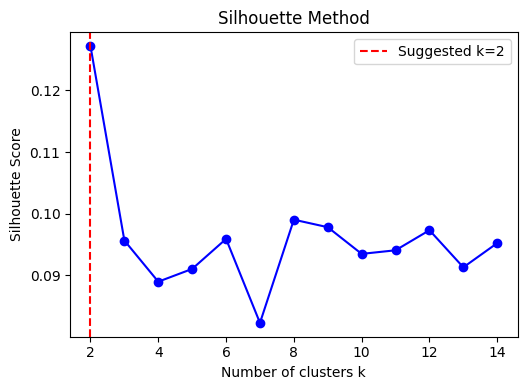

Suggested k by Silhouette Method: 2


In [39]:
# Suppress joblib warning and set logical cores

os.environ["LOKY_MAX_CPU_COUNT"] = str(os.cpu_count())
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")

# Range of clusters to try

K = range(2, 15)

# SILHOUETTE METHOD 
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

# Best k is where silhouette score is highest
sil_k = K[sil_scores.index(max(sil_scores))]

# PLOT BOTH CHARTS SIDE BY SIDE 
plt.figure(figsize=(10, 4))  # wider figure for side-by-side

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.axvline(x=sil_k, color='red', linestyle='--', label=f'Suggested k={sil_k}')
plt.legend()

plt.tight_layout()
plt.show()

# PRINT SUGGESTED k 
print(f"Suggested k by Silhouette Method: {sil_k}")

### Determination of optimal number of K using dendrogram with hierarchical clustering.

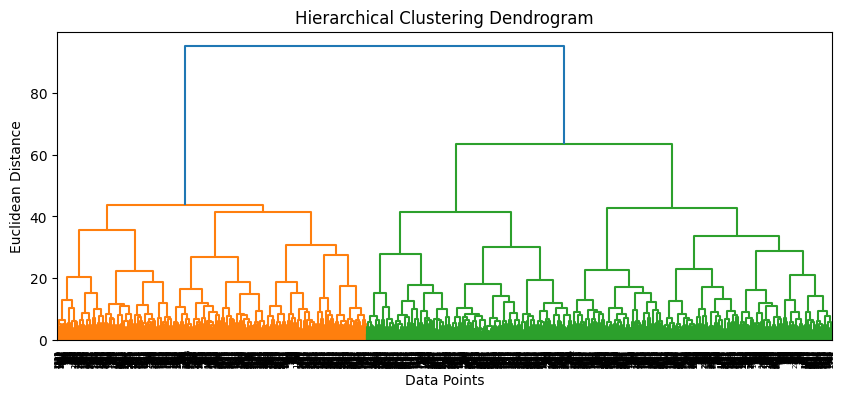

Estimated optimal number of clusters (k): 2

Cluster distribution:
Cluster
2    1739
1    1157
Name: count, dtype: int64


In [43]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 4))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# --- Automatic estimation of k ---
# Get distances at each merge
distances = linked[:, 2]

# Compute the differences between successive distances
diffs = np.diff(distances)

# Find the largest jump (the "elbow" in hierarchical clustering)
k_estimate = len(distances) - np.argmax(diffs)
print("Estimated optimal number of clusters (k):", k_estimate)

# --- Optional: assign clusters automatically ---
clusters = fcluster(linked, k_estimate, criterion='maxclust')
X['Cluster'] = clusters

# Show how many data points per cluster
print("\nCluster distribution:")
print(X['Cluster'].value_counts())

### Aplication of K-means clustering

In [43]:
# Choose number of clusters
chosen_k = 2  

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)

# Predict cluster labels
X['Cluster'] = kmeans.fit_predict(X)

# Check how many data points are in each cluster
print(X['Cluster'].value_counts())

Cluster
1    1731
0    1165
Name: count, dtype: int64


In [45]:
# Save X including the new 'Cluster' column
output_path = r"C:\Users\USER\Documents\Customer Intention\clustered_data.csv"
X.to_csv(output_path, index=False)
print(f"✅ Clustered dataset saved to {output_path}")

✅ Clustered dataset saved to C:\Users\USER\Documents\Customer Intention\clustered_data.csv


#### Load the saaved dataset X with column cluster

In [3]:
# Load the saved dataset
df = pd.read_csv(r"C:\Users\USER\Documents\Customer Intention\clustered_data.csv")
print(df.shape)
df.head()

(2896, 56)


,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,age_group_Young,balance_group_High,balance_group_Low,day_group_Early,day_group_Late,day_group_Mid,campaign_group_High,campaign_group_Low,campaign_group_Moderate,Cluster
0,1.926007,1.335830,-1.3309,2.203134,-1.140505,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,1.613101,-0.825674,-1.3309,2.224320,-1.140505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0.048571,0.432495,-1.3309,2.224320,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,1.508799,1.442522,-1.3309,1.414520,-1.140505,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,1.404497,-0.643077,-1.3309,1.611255,0.070962,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0


**Codes below visualize the clusters using T_SNE**

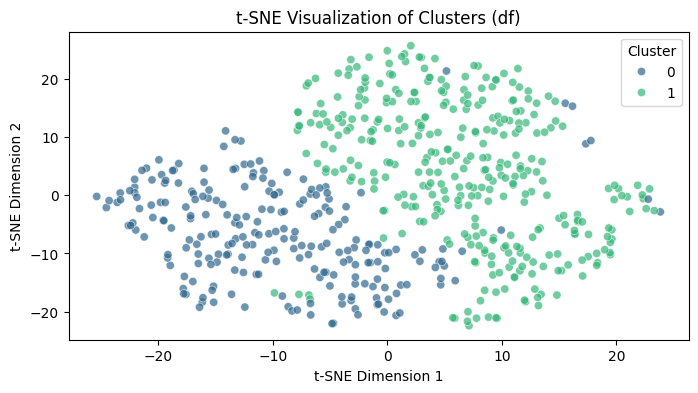

In [5]:

# 1️ Sample smaller subset if needed 
df_sample = df.sample(frac=0.2, random_state=42)
df_tsne_input = df_sample.drop(columns=['Cluster'], errors='ignore')

# 2 Run t-SNE 
tsne = TSNE(
    n_components=2, 
    perplexity=40, 
    learning_rate=200,
    max_iter=1000,      
    random_state=42,
    init='pca'
)
df_embedded = tsne.fit_transform(df_tsne_input)

# 3️ Create DataFrame for plotting ===
df_embedded_df = pd.DataFrame(df_embedded, columns=['TSNE1', 'TSNE2'])
df_embedded_df['Cluster'] = df_sample['Cluster'].values

# 4️ Plot 
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='Cluster', 
    data=df_embedded_df, palette='viridis', alpha=0.7
)
plt.title('t-SNE Visualization of Clusters (df)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

**Codes below visualize the clusters using U-Map**

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


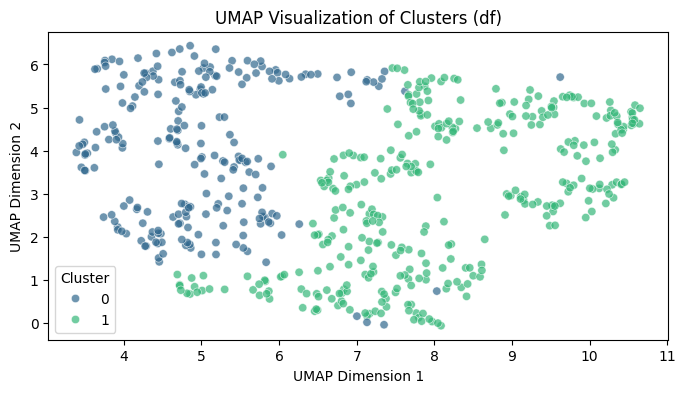

In [7]:
# 1. Sample smaller subset if needed
df_sample = df.sample(frac=0.2, random_state=42)
df_umap_input = df_sample.drop(columns=['Cluster'], errors='ignore')

# 2. Create UMAP model (correct syntax)
umap_model = umap.UMAP(
    n_components=2,        # 2D projection
    n_neighbors=15,        # Controls local vs global structure
    min_dist=0.1,          # How tightly points are packed
    metric='euclidean',    # Distance metric
    random_state=42
)

# 3. Fit and transform
df_embedded = umap_model.fit_transform(df_umap_input)

# 4. Create DataFrame for plotting
df_embedded_df = pd.DataFrame(df_embedded, columns=['UMAP1', 'UMAP2'])
df_embedded_df['Cluster'] = df_sample['Cluster'].values

# 5. Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='Cluster',
    data=df_embedded_df, palette='viridis', alpha=0.7
)
plt.title('UMAP Visualization of Clusters (df)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

#### Reverse the numerical features in the clustered dataset to human readable.

Codes below reverse numerical features age, balance, day, duration amd campaign to human readable values using the saved prepeocessing pipeliene

In [48]:
# Add path to custom transformers
sys.path.append(r"C:\Users\USER\Documents\Customer Intention")
from Post_camp_prep_custom_transformers import NumericTransformer

# 1 Load clustered dataset
clustered_path = r"C:\Users\USER\Documents\Customer Intention\Clustered_data.csv"
df_clustered = pd.read_csv(clustered_path)

# 2️ Load preprocessing pipeline 
pipeline_path = r"C:\Users\USER\Documents\Customer Intention\post_campaign_dynamic_preprocessing_pipeline.pkl"
pipeline = joblib.load(pipeline_path)

# Access numeric transformer
num_transformer = pipeline['preprocessor'].named_transformers_['num']

# 3 Inverse transform numeric features
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign']

def inverse_numeric(value, feature_name, transformer):
    cfg = transformer.column_configs[feature_name]
    val = np.array(value).reshape(-1,1)
    val = transformer.scalers[feature_name].inverse_transform(val)
    if cfg['yeo']:
        val = transformer.pt_transformers[feature_name].inverse_transform(val)
    return val.flatten()

for col in numeric_features:
    df_clustered[col] = inverse_numeric(df_clustered[col].values, col, num_transformer)

# Optional: round age to integer
df_clustered['age'] = df_clustered['age'].astype(int)

# 4 Display full DataFrame nicely 
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 200)         # wide enough
pd.set_option('display.max_rows', 5)        # show first 5 rows

print("✅ Clustered data with human-readable numeric features and all original encoded categorical columns:")
display(df_clustered)

✅ Clustered data with human-readable numeric features and all original encoded categorical columns:


,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,age_group_Middle,age_group_Old,age_group_Young,balance_group_High,balance_group_Low,day_group_Early,day_group_Late,day_group_Mid,campaign_group_High,campaign_group_Low,campaign_group_Moderate,Cluster
0,59,2343.0,5.0,1042.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,56,45.0,5.0,1058.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,30,3340.0,3.0,238.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2895,54,200.0,3.0,170.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0


Result above shown that the numerical features have been converted to human readable values.

**Group clusters in df_clustered by mean, STD, difference, absolute difference, compute range of the numerical features and sort by absolute difference**

In [56]:
# Define numeric and categorical features 
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign']
categorical_features = [c for c in df_clustered.columns if c not in numeric_features + ['Cluster']]

# 1. Compute mean and std per cluster for numeric features ===
mean_numeric = df_clustered.groupby('Cluster')[numeric_features].mean().T
std_numeric = df_clustered.groupby('Cluster')[numeric_features].std().T

# Combine numeric summary
summary_numeric = mean_numeric.copy()
for col in mean_numeric.columns:
    summary_numeric[f'Std_{col}'] = std_numeric[col]

# Difference and absolute difference (only for 2 clusters)
clusters = sorted(df_clustered['Cluster'].unique())
if len(clusters) == 2:
    c0, c1 = clusters
    summary_numeric['Difference'] = summary_numeric[c1] - summary_numeric[c0]
    summary_numeric['Abs_Diff'] = summary_numeric['Difference'].abs()
else:
    print("More than 2 clusters: Difference and Abs_Diff valid only for 2 clusters")

# Compute min-max range for numeric features
summary_numeric['Range_0'] = df_clustered[df_clustered['Cluster'] == c0][numeric_features].agg(
    lambda x: f"[{int(np.floor(x.min()))}, {int(np.ceil(x.max()))}]")
summary_numeric['Range_1'] = df_clustered[df_clustered['Cluster'] == c1][numeric_features].agg(
    lambda x: f"[{int(np.floor(x.min()))}, {int(np.ceil(x.max()))}]")

# 2 Compute mean, std, diff, abs diff for categorical features 
mean_categorical = df_clustered.groupby('Cluster')[categorical_features].mean().T
std_categorical = df_clustered.groupby('Cluster')[categorical_features].std().T

summary_categorical = mean_categorical.copy()
for col in mean_categorical.columns:
    summary_categorical[f'Std_{col}'] = std_categorical[col]

if len(clusters) == 2:
    summary_categorical['Difference'] = summary_categorical[c1] - summary_categorical[c0]
    summary_categorical['Abs_Diff'] = summary_categorical['Difference'].abs()

# No range for categorical features
summary_categorical['Range_0'] = ""
summary_categorical['Range_1'] = ""

# 3. Combine numeric and categorical features 
full_summary = pd.concat([summary_numeric, summary_categorical], axis=0)

# 4️ Round numeric columns for readability 
round_cols = [c0, c1, f'Std_{c0}', f'Std_{c1}', 'Difference', 'Abs_Diff']
full_summary[round_cols] = full_summary[round_cols].round(3)

# 5 Remove decimal point in age 
if 'age' in full_summary.index:
    full_summary.loc['age', [c0, c1, f'Std_{c0}', f'Std_{c1}', 'Difference', 'Abs_Diff']] = \
        full_summary.loc['age', [c0, c1, f'Std_{c0}', f'Std_{c1}', 'Difference', 'Abs_Diff']].astype(int)

# 6 Sort all features by absolute difference 
full_summary.sort_values('Abs_Diff', ascending=False, inplace=True)

# Display full summary
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(full_summary.head(20))

Cluster                    0         1     Std_0     Std_1  Difference  Abs_Diff     Range_0     Range_1
balance             1256.847  1032.043  1238.976  1156.612    -224.804   224.804   [0, 3379]   [0, 3379]
age                   50.000    32.000     7.000     4.000     -18.000    18.000    [41, 70]    [22, 41]
duration             631.401   622.689   312.967   310.821      -8.712     8.712  [15, 1058]  [15, 1058]
age_group_Young        0.000     0.998     0.000     0.042       0.998     0.998                        
age_group_Middle       0.954     0.002     0.210     0.042      -0.952     0.952                        
marital_single         0.112     0.518     0.315     0.500       0.407     0.407                        
marital_married        0.672     0.402     0.470     0.490      -0.271     0.271                        
day                   15.679    15.927     8.643     8.500       0.248     0.248     [0, 31]     [0, 31]
housing_no             0.586     0.433     0.493     0.

**From the statics of the top 20 features:**

**Cluster 0** consists of older customers aged between 41 and 70+. About 62% of them have a high account balance (greater than €407), while 37% have a low account balance (less than or equal to €407). 67% are married, 11% are single, and 21% are divorced. Around 12% are retired. Only 41% of this group showed interest in a housing loan.
* Given their financial stability and life stage, this group is more inclined toward low-risk, income-generating, and capital-preserving products. Suitable offerings include term deposits, government or corporate bonds, retirement and pension plans, life or health insurance products, and personalized wealth management or estate planning services. Marketing strategies for this segment should emphasize financial security, stable income, and long-term comfort, rather than aggressive loan-based products.

**Cluster 1** consists of younger customers aged approximately 19 to 41 years (with ages below 22 compressed to 22 due to winsorization). About 55% of them have a high account balance (greater than €407), while 45% have a low account balance (less than or equal to €407). 40% are married, 51% are single, and 0.8% are divorced. Around 0.1% are retired and 57% of this group showed interest in a housing loan.
* Given their younger age, career stage, and growing financial activity, this group is more inclined toward moderate-risk, growth-oriented financial products that support wealth accumulation and lifestyle advancement. Suitable offerings include flexible savings plans, entry-level mutual funds or ETFs, home and personal loans, and retirement starter plans. Insurance products such as health and income protection plans are also relevant at this life stage. Marketing strategies for this segment should emphasize financial growth, independence, and convenience—highlighting digital banking solutions, automated investing, and opportunities to build assets early in life.